import

In [1]:
import matplotlib.pyplot as plt
import torch
import os
import pandas as pd
import math

from tqdm.notebook import tqdm as tqdm
from tqdm.auto import trange

import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.insert(1, '../train')
sys.path.insert(1, '../misc')

import config_plots, TrialStatistics
import CNN, dataLoader
from configParser import ConfigParser, getModelName
from flashtorch_modefied import CNN_wrapper, Backprop, SaliencyMap

config_plots.global_settings()

experimetnsFileName = "experiments.csv"

parameters

In [2]:
experimentsPath="/raid/elhamod/Fish/official_experiments/" # Where experiment results will be produced
dataPath="/raid/elhamod/Fish/Curated4" # Where data is
experimentName="Easy"

trial_hash="268af0509863b63158fbca64174789deb89ce5648a76506daf7f8db5" #HGNN

fileName= '/raid/elhamod/Fish/Curated4/Easy_50/test/Notropis nubilus/INHS_FISH_81913.jpg'

cuda=0

cuda

In [3]:
# set cuda
if torch.cuda.is_available():
    torch.cuda.set_device(cuda)
    print("using cuda", cuda)

using cuda 0


importLoad experiment

In [4]:
config_parser = ConfigParser(experimentsPath, dataPath, experimentName)

experimentPathAndName = os.path.join(experimentsPath, experimentName)

datasetManager = dataLoader.datasetManager(experimentPathAndName, dataPath)

paramsIterator = config_parser.getExperiments()  
number_of_experiments = sum(1 for e in paramsIterator)  

load dataset and model

In [5]:
# Get experiment parameters
experimentsFileNameAndPath = os.path.join(experimentsPath, experimetnsFileName)
if os.path.exists(experimentsFileNameAndPath):
    experiments_df = pd.read_csv(experimentsFileNameAndPath)
else:
    raise Exception("Experiment not " + trial_hash + " found!")
experimentRecord = experiments_df[experiments_df["trialHash"] == trial_hash]
experiment_params = experimentRecord.to_dict('records')[0]
experiment_params = config_parser.fixExperimentParams(experiment_params)

if math.isnan(experiment_params['suffix']):
    experiment_params['suffix'] = None
print(experiment_params)

# Create the model
datasetManager.updateParams(config_parser.fixPaths(experiment_params))
train_loader, validation_loader, test_loader = datasetManager.getLoaders()
fineList = test_loader.dataset.csv_processor.getFineList()
coarseList = test_loader.dataset.csv_processor.getCoarseList()
numberOffine = len(fineList)
numberOfcoarse = len(coarseList)
architecture = {
    "fine": numberOffine,
    "coarse" : numberOfcoarse
}
model = CNN.create_model(architecture, experiment_params, device=cuda)

{'experimentName': 'Easy', 'modelName': 'models/268af0509863b63158fbca64174789deb89ce5648a76506daf7f8db5', 'datasetName': nan, 'experimentHash': 'fbf4c275e857df725e65ca95f294905a0966e68874b376dc8d1d1da9', 'trialHash': '268af0509863b63158fbca64174789deb89ce5648a76506daf7f8db5', 'image_path': 'Easy_50', 'suffix': None, 'img_res': 448, 'augmented': True, 'batchSize': 64, 'learning_rate': 0.0001, 'numOfTrials': 5, 'modelType': 'HGNN', 'lambda': 0.01, 'pretrained': True, 'tl_model': 'ResNet18', 'link_layer': 'avgpool', 'adaptive_smoothing': True, 'adaptive_lambda': 0.01, 'adaptive_alpha': 0.9, 'fc_layers': 1, 'unsupervisedOnTest': nan, 'noSpeciesBackprop': nan, 'phylogeny_loss': nan, 'phylogeny_loss_epsilon': nan}
Creating datasets...
Creating datasets... Done.
Creating loaders...
Creating loaders... Done.


Load model of a specific trial

In [6]:
# get the model and the parameters
modelName = experimentRecord.iloc[0]["modelName"]
trialName = os.path.join(experimentPathAndName, modelName)

df, epochs, time_elapsed = CNN.loadModel(model, trialName, device=cuda)

Model wrapper

In [7]:
wrapped_model = CNN_wrapper(model, experiment_params, test_loader.dataset)

Saliency map of one image

In [8]:
# params
wrapped_model.setOutputsOfInterest({
    "fine": True,
    "coarse" : False
})

layerName = "fine"

Number of activations:  torch.Size([1, 38])


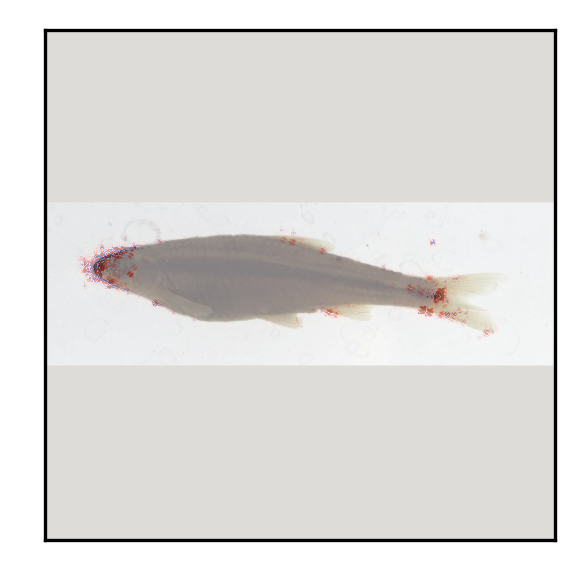

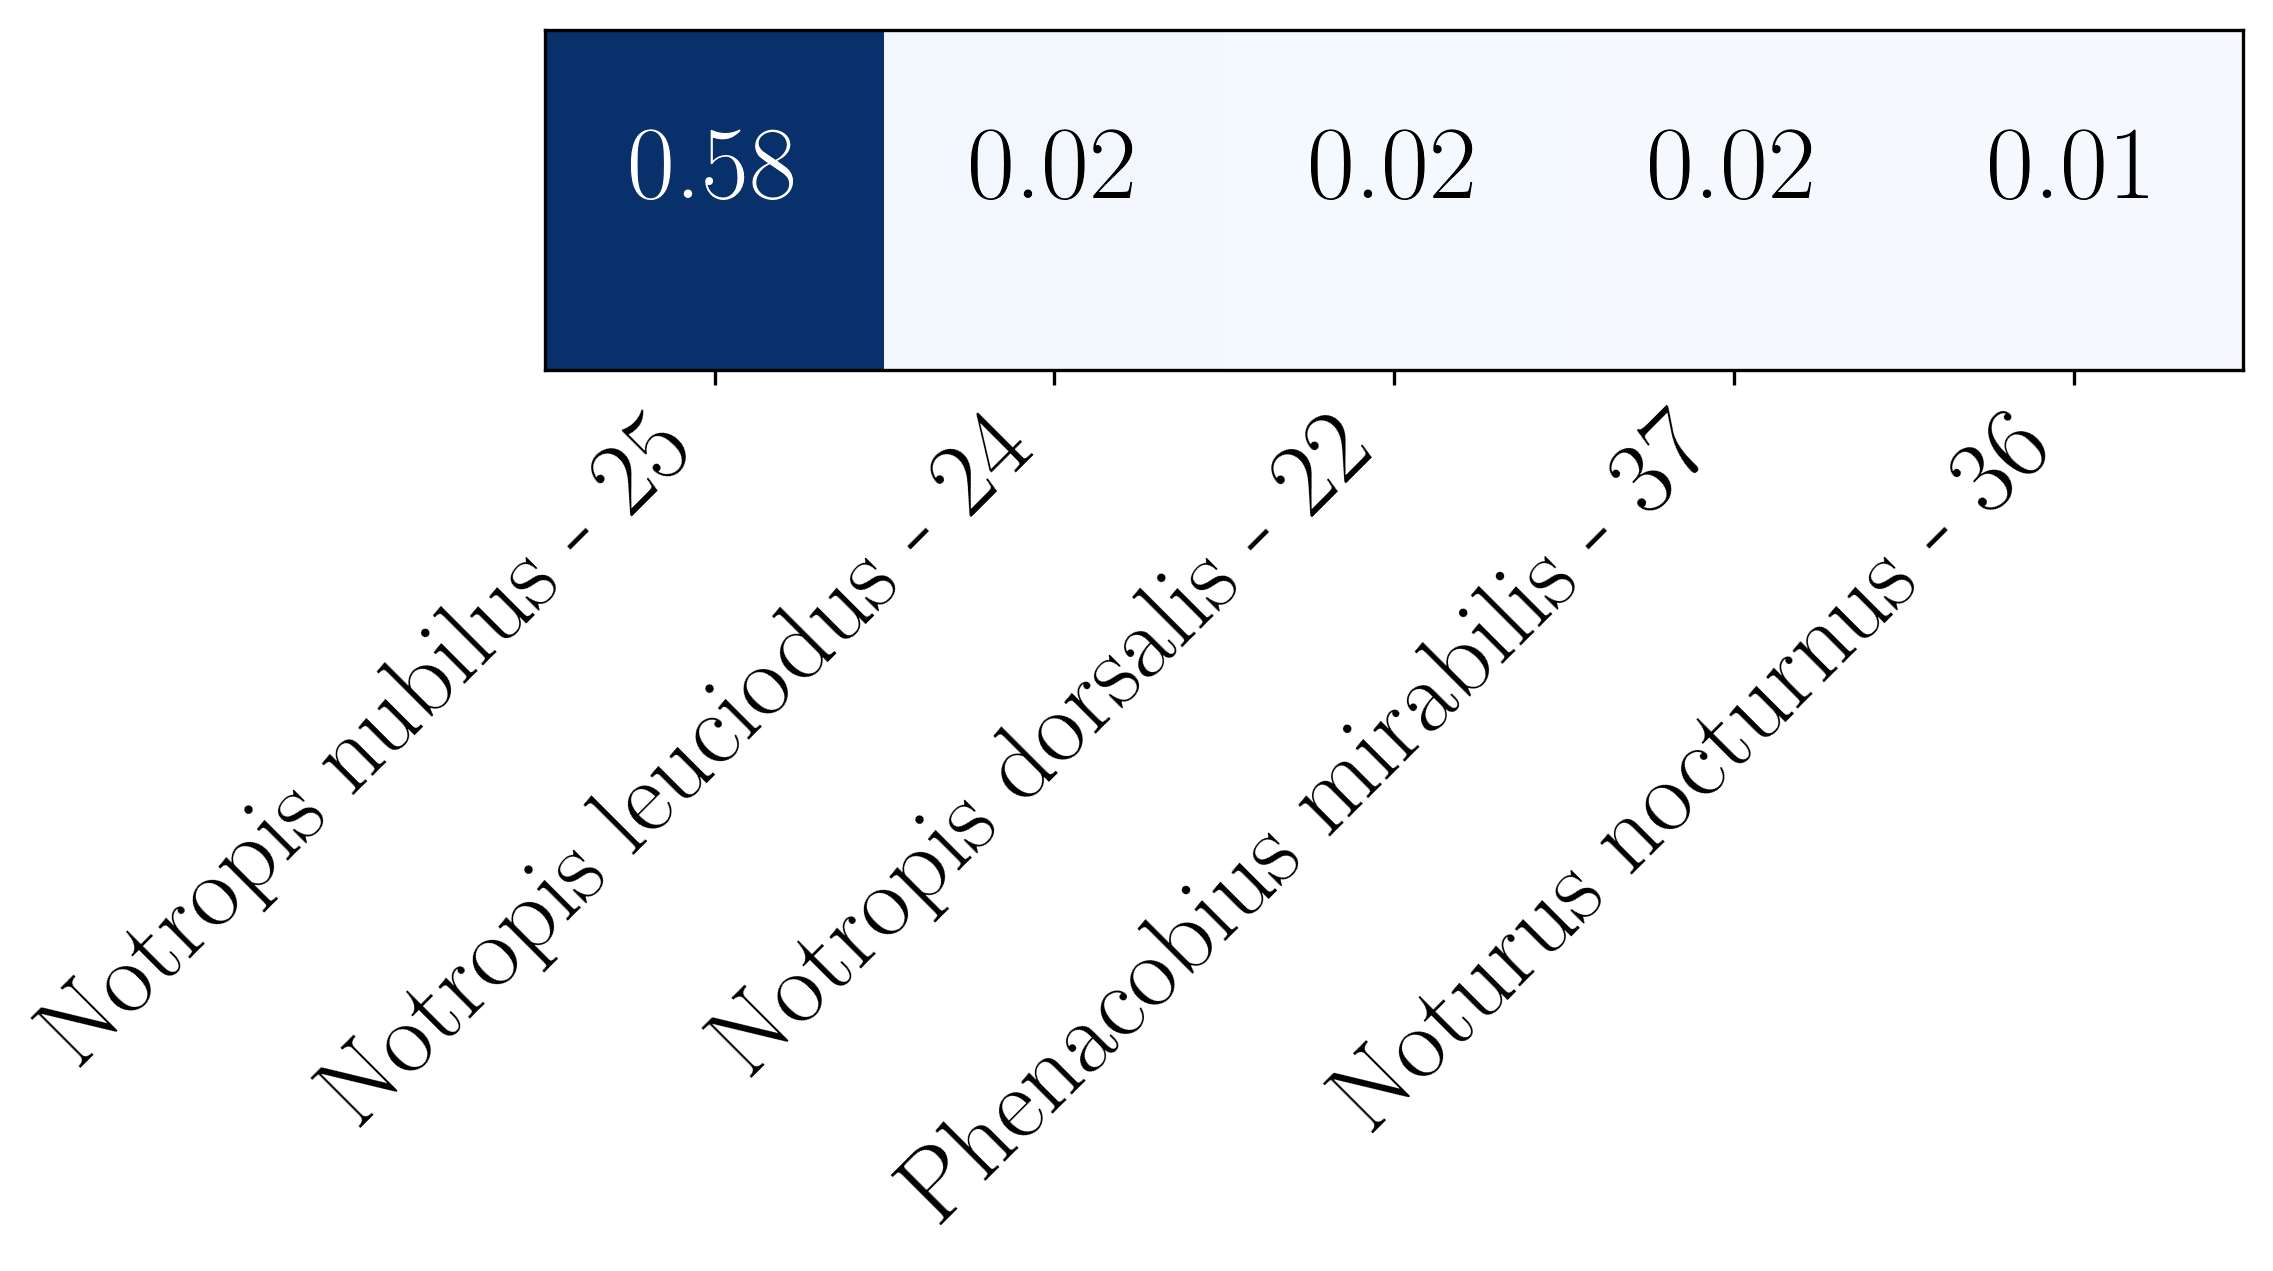

In [9]:
# %%capture
import os
from torchvision import transforms as torchvision_transforms
from skimage import io

saliencyMap = SaliencyMap(test_loader.dataset, wrapped_model, experimentPathAndName, trial_hash, experiment_params)
_, _ = saliencyMap.GetSaliencyMap(fileName, layerName, use_gpu=True)

box_width =  49
Number of activations:  torch.Size([1, 38])


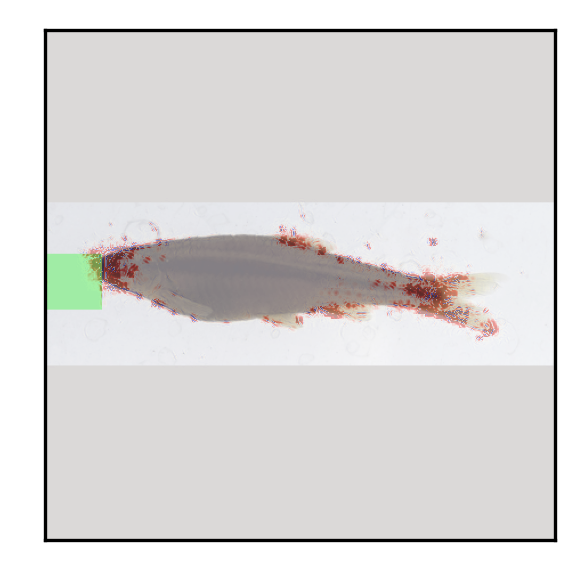

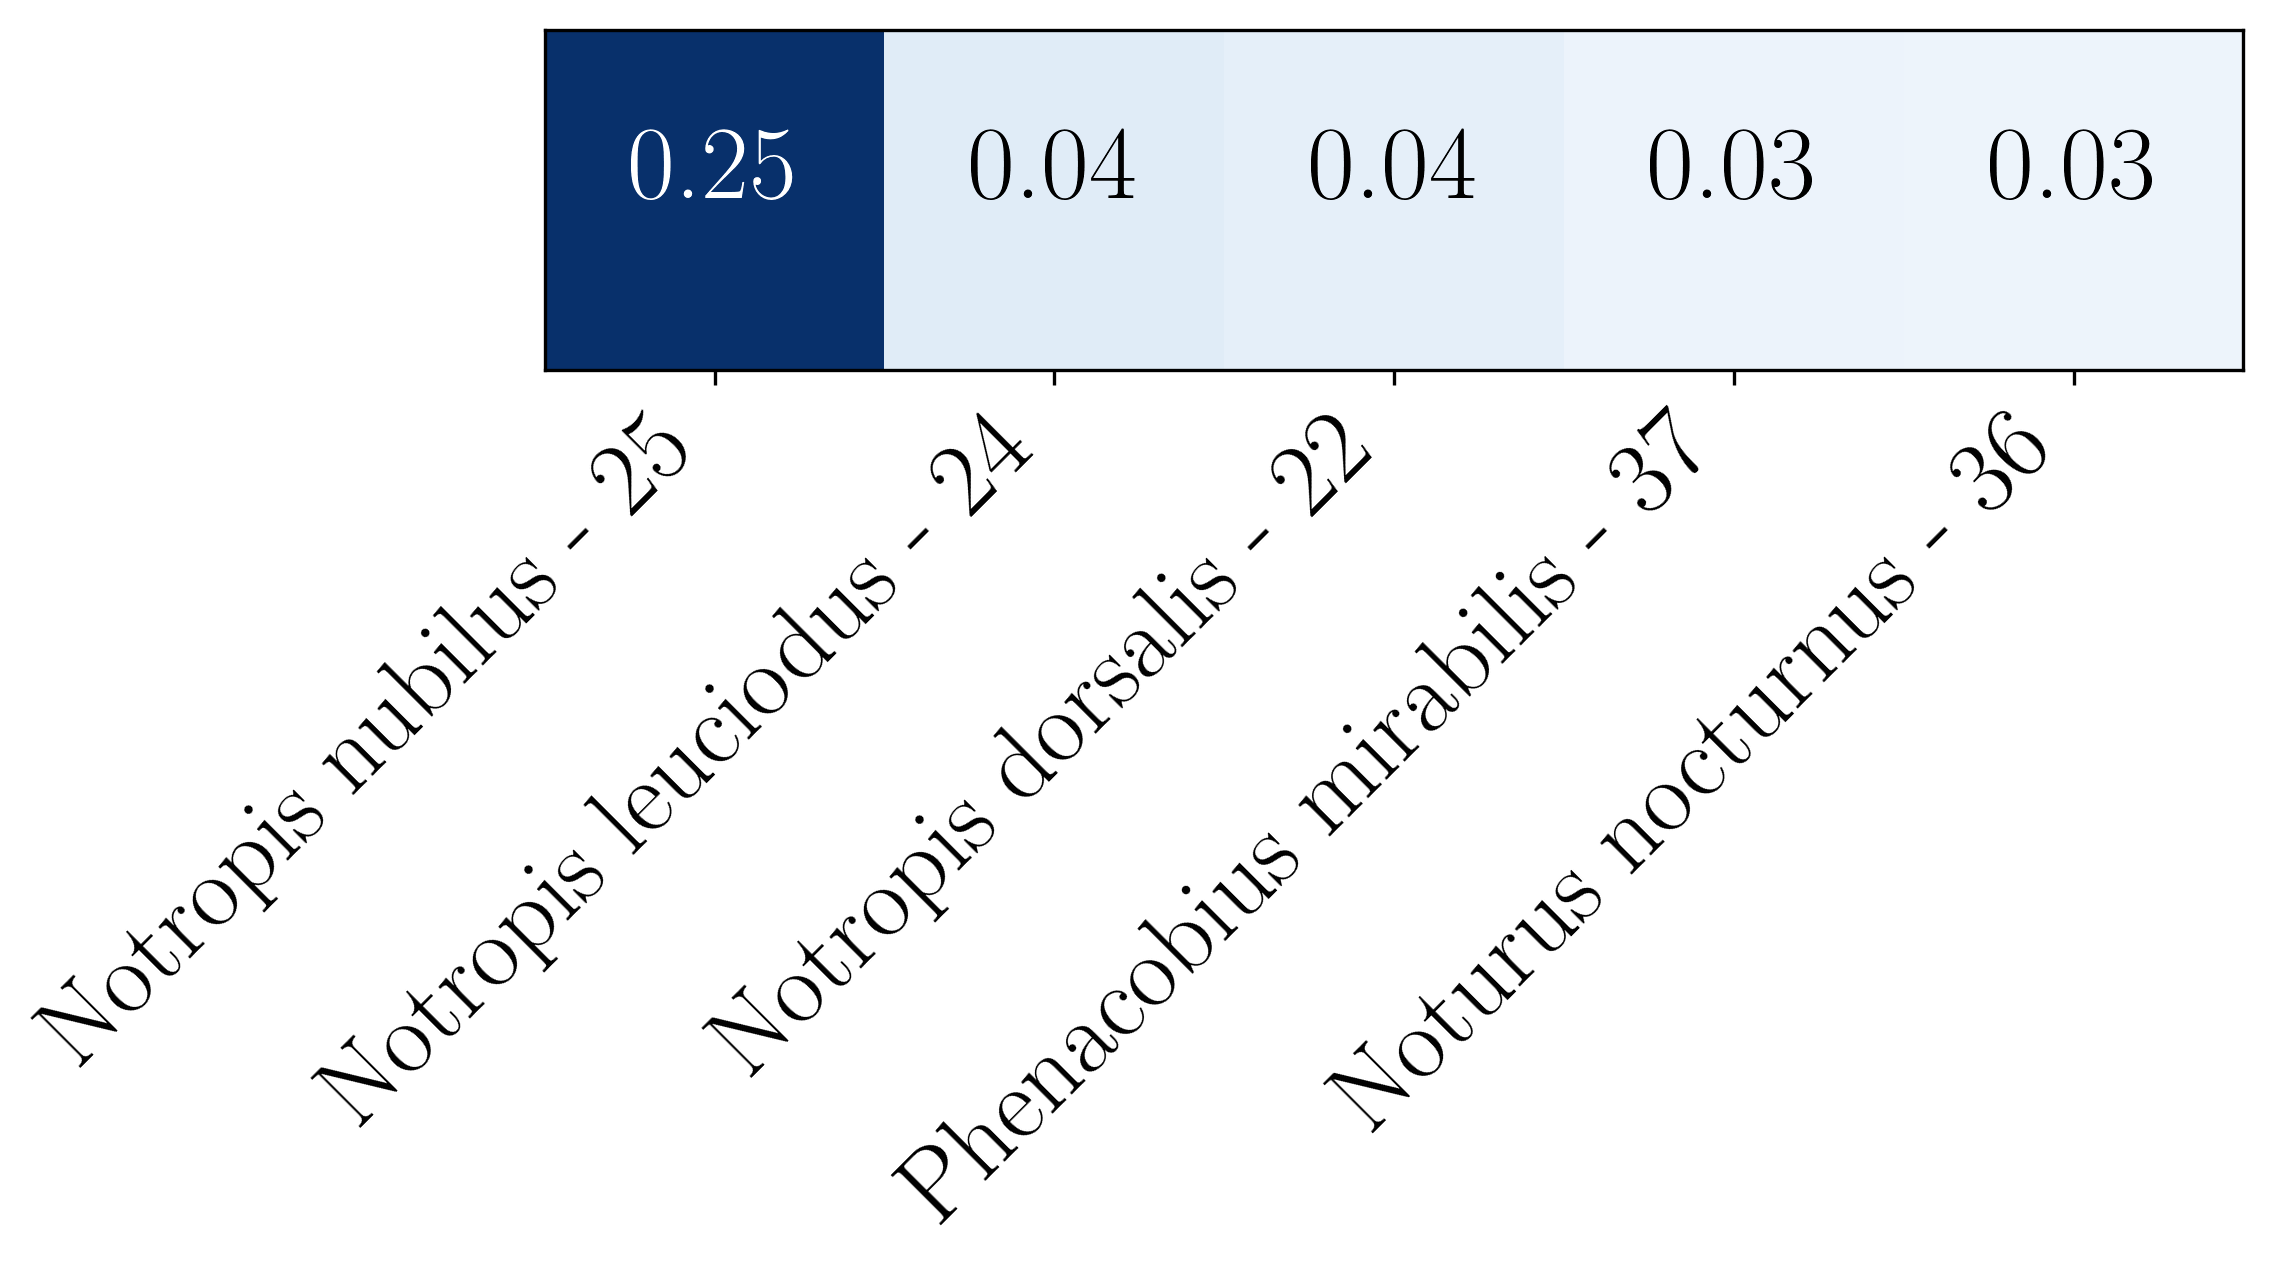

Number of activations:  torch.Size([1, 38])


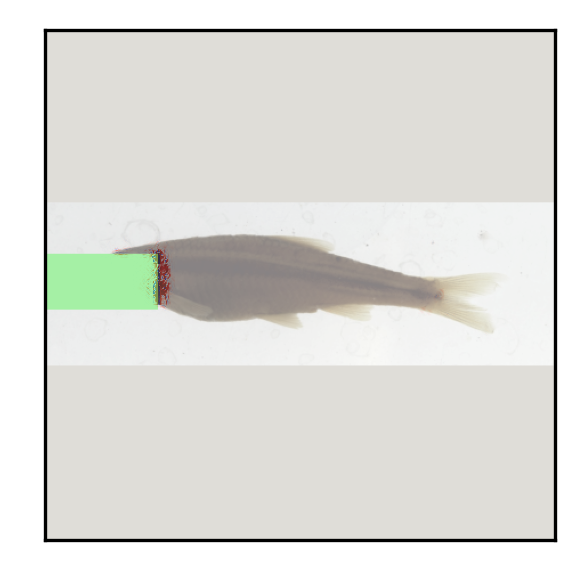

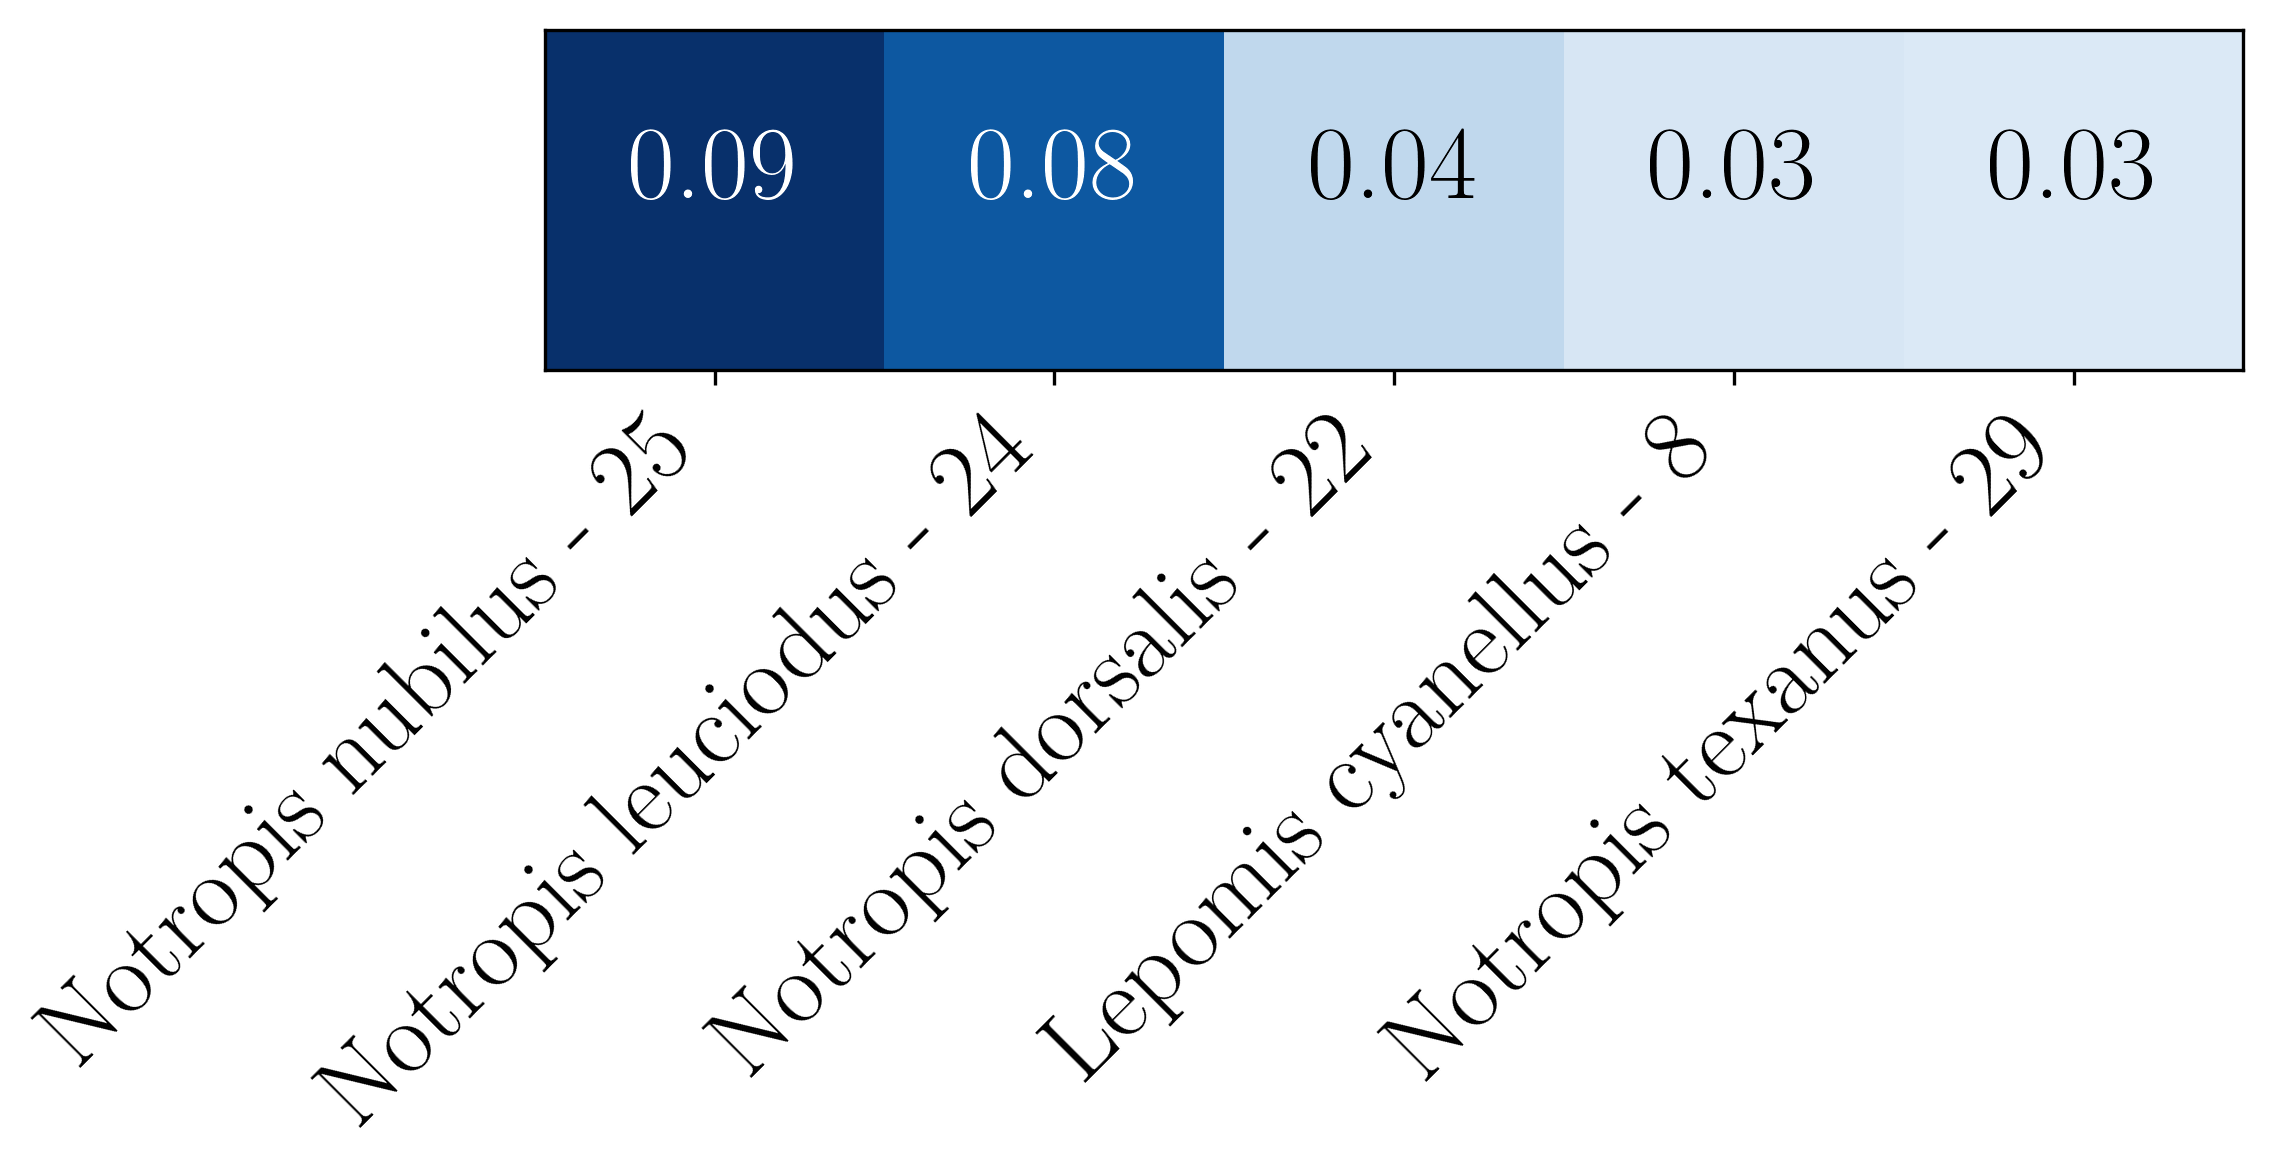

Number of activations:  torch.Size([1, 38])


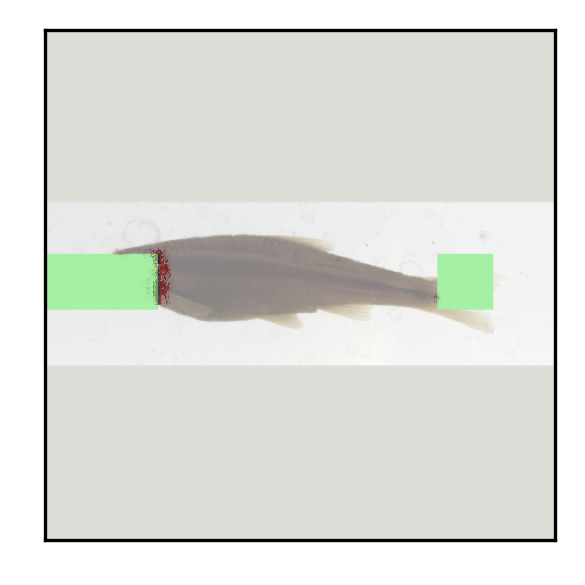

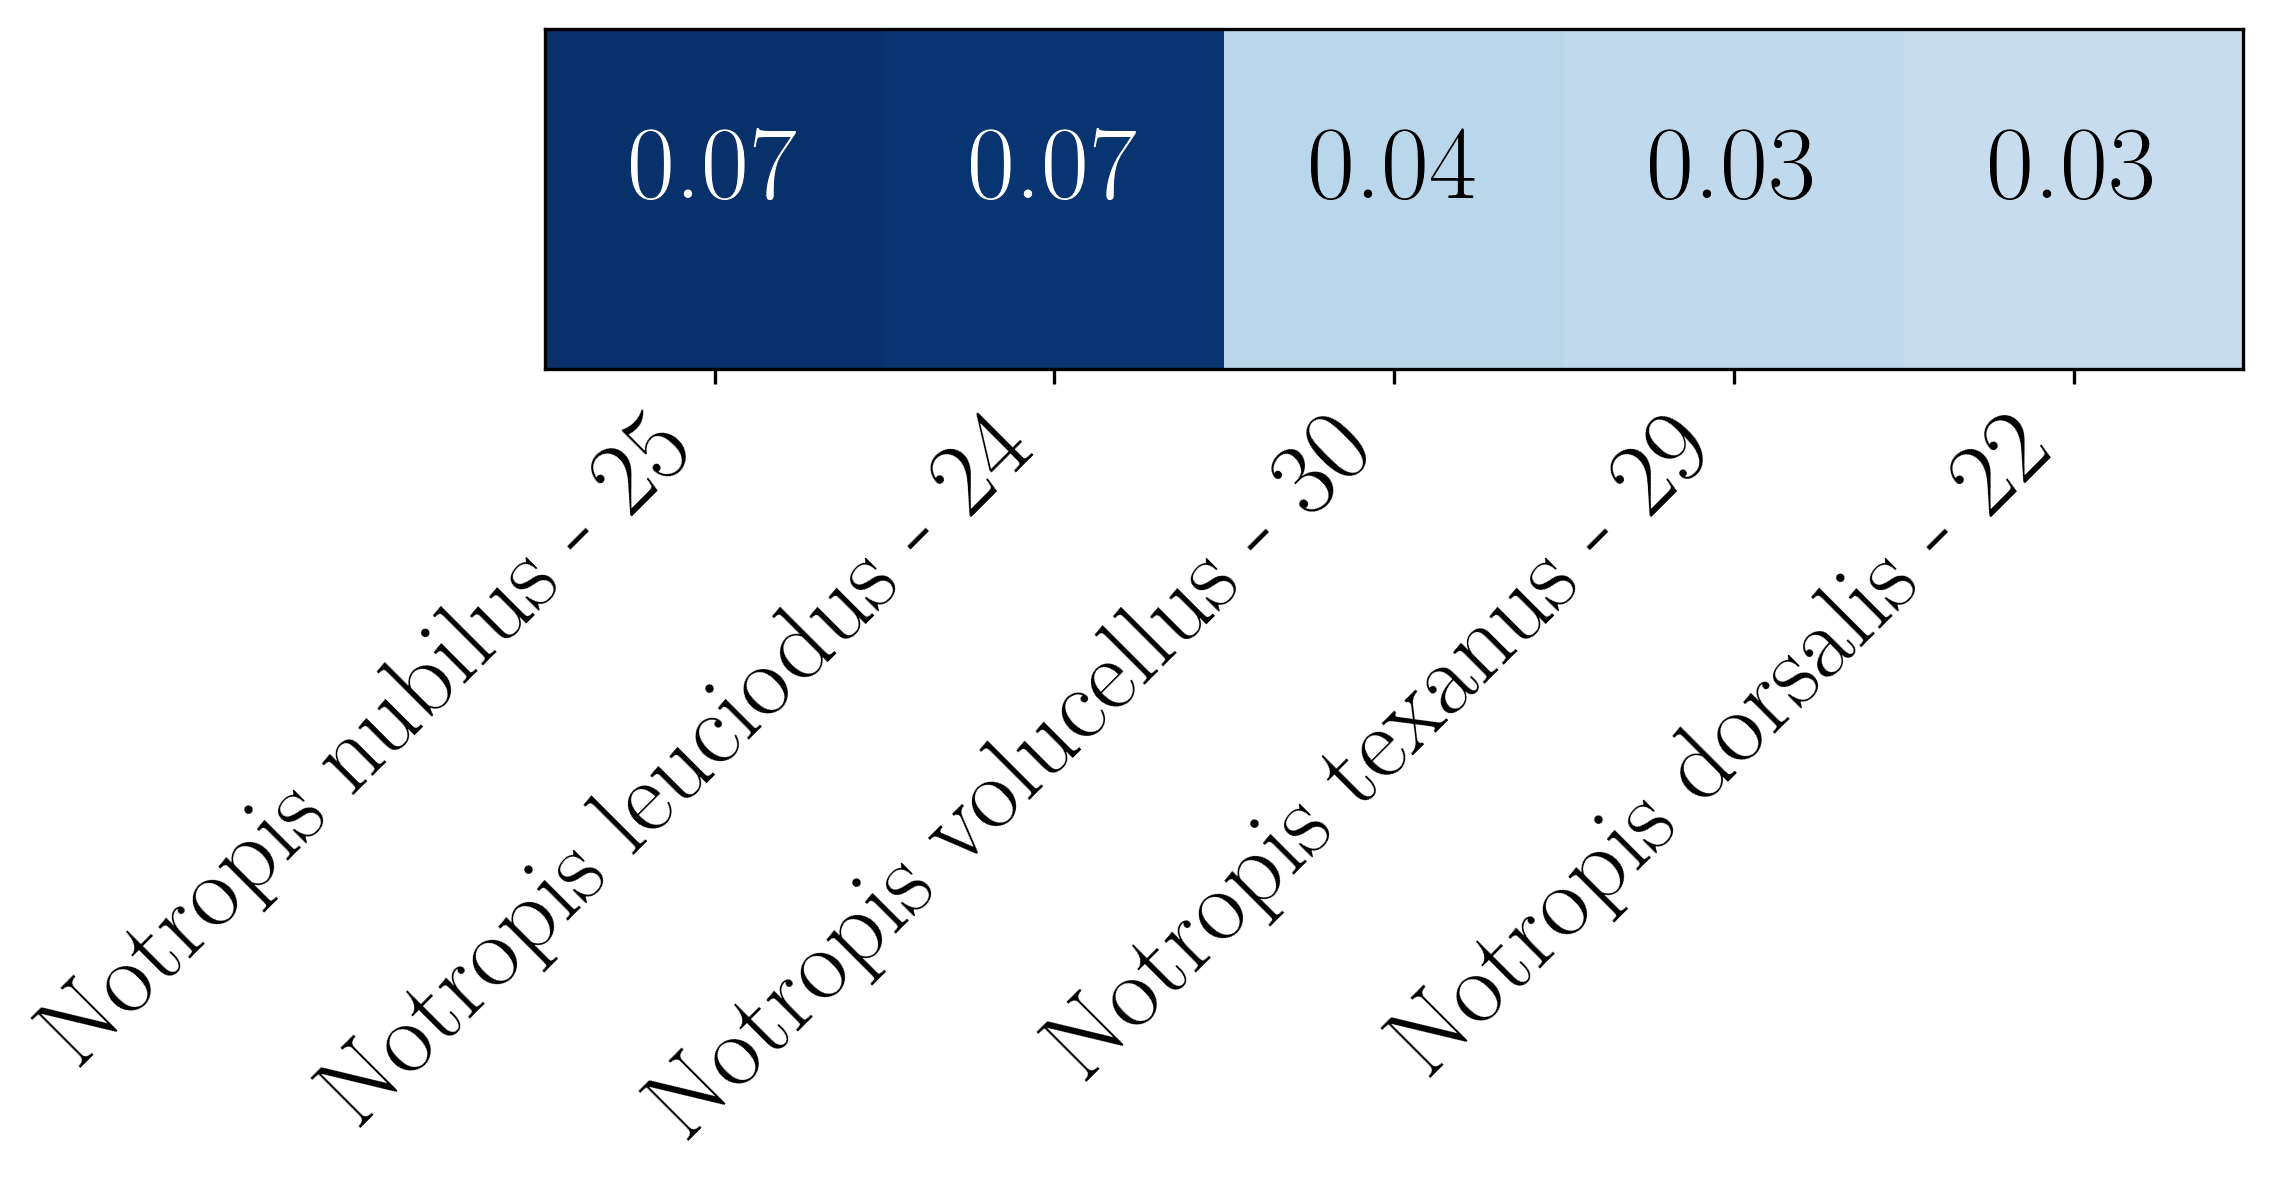

Number of activations:  torch.Size([1, 38])


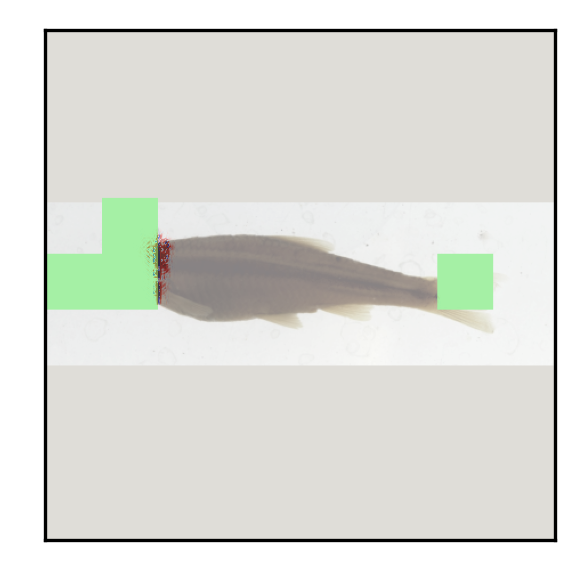

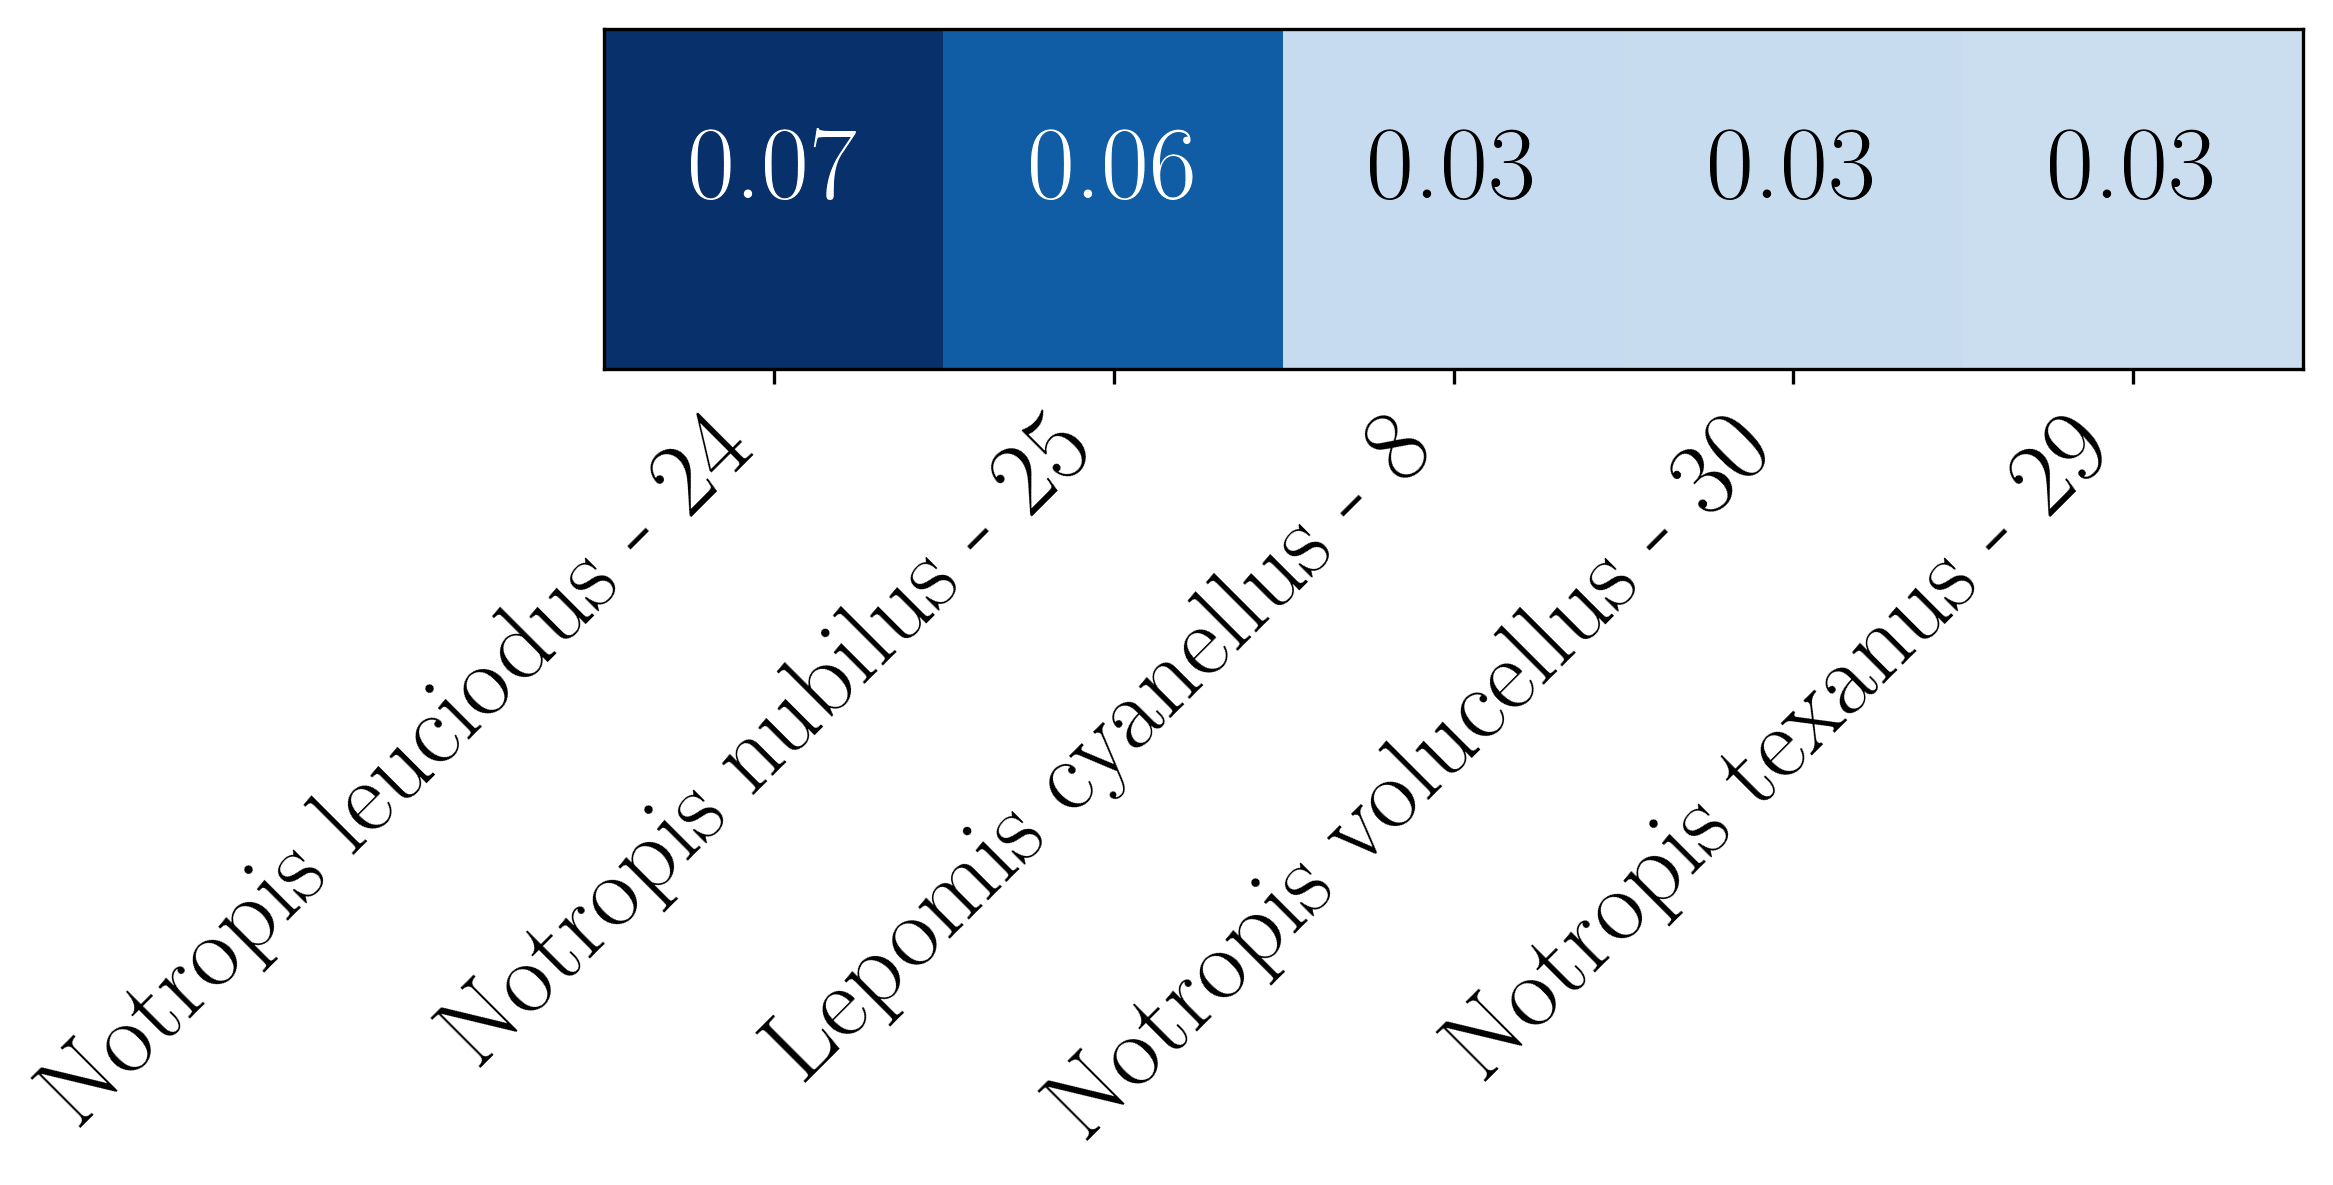

In [10]:
for i in [49]: #9, 19, 29 ,39 ,
    print('box_width = ', i)
    saliencyMap.GetSaliencyMap(fileName,layerName,box_width =i, maxCovered=True, topk=4, use_gpu=True)